# **Name:-Karsh Mistry**

### Task-3-Customer Purchase Prediction Using Decision Tree Classifier on Bank Marketing Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
#Load the Dataset
import pandas as pd
df = pd.read_csv('bank-additional-full.csv', sep=';', encoding='utf-8')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#Check for Missing Values and Dataset Info
df.info()
print("Missing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
#Encode Categorical Variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [6]:
# Define X (features) and y (target variable)
X = df.drop(columns=['y'])  # Exclude the target column
y = df['y']
# Display shape of X and y
print("Feature Matrix Shape:", X.shape)
print("Target Variable Shape:", y.shape)

Feature Matrix Shape: (41188, 20)
Target Variable Shape: (41188,)


In [7]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display shapes of the train-test split
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (32950, 20)
X_test Shape: (8238, 20)
y_train Shape: (32950,)
y_test Shape: (8238,)


In [8]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Convert back to DataFrame for reference
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)
# Display first five rows of scaled features
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.863739,-0.757779,-0.284871,-0.818379,1.933816,-1.08747,-0.453839,-0.758915,1.192670,1.427938,-0.120196,0.522981,0.196584,-0.350127,0.193670,-0.114858,-0.648967,-0.322269,0.288964,0.398990
1,-0.289722,-0.479529,-0.284871,1.053452,-0.516547,-1.08747,-0.453839,1.317671,1.192670,1.427938,-0.216732,-0.203688,0.196584,1.653813,-2.552217,-0.114858,-0.648967,-0.322269,0.288964,0.398990
2,3.651268,0.355224,-0.284871,-1.754295,-0.516547,-1.08747,-0.453839,-0.758915,-0.531722,-0.714554,3.436173,-0.567023,0.196584,-0.350127,0.193670,-1.133161,1.103451,0.045048,-1.583296,-2.420139
3,-0.385843,-1.036030,-0.284871,1.053452,-0.516547,0.94245,-0.453839,1.317671,0.761572,-0.714554,-0.533368,-0.203688,0.196584,-0.350127,0.193670,0.648868,0.721890,0.887717,0.713535,0.332723
4,1.824956,0.355224,-1.928167,1.053452,-0.516547,-1.08747,-0.453839,-0.758915,-0.100624,0.713774,0.424264,-0.203688,0.196584,-0.350127,0.193670,-1.896888,-1.058152,-0.062987,-1.357472,-1.252175


In [9]:
# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
# Train the model
clf.fit(X_train, y_train)
# Predict on test set
y_pred = clf.predict(X_test)
# Display first 10 predictions and actual values
print("First 10 Predicted Values:", y_pred[:10])
print("First 10 Actual Values:   ", y_test.values[:10])

First 10 Predicted Values: [0 0 0 0 0 0 0 0 0 0]
First 10 Actual Values:    [0 0 0 0 0 0 0 0 1 0]


Model Accuracy: 0.8956057295460063

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      7310
           1       0.53      0.57      0.55       928

    accuracy                           0.90      8238
   macro avg       0.74      0.75      0.75      8238
weighted avg       0.90      0.90      0.90      8238



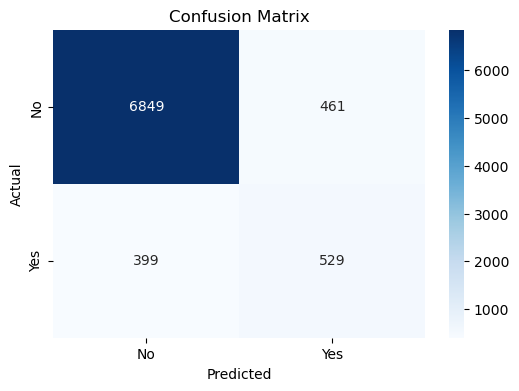

In [10]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

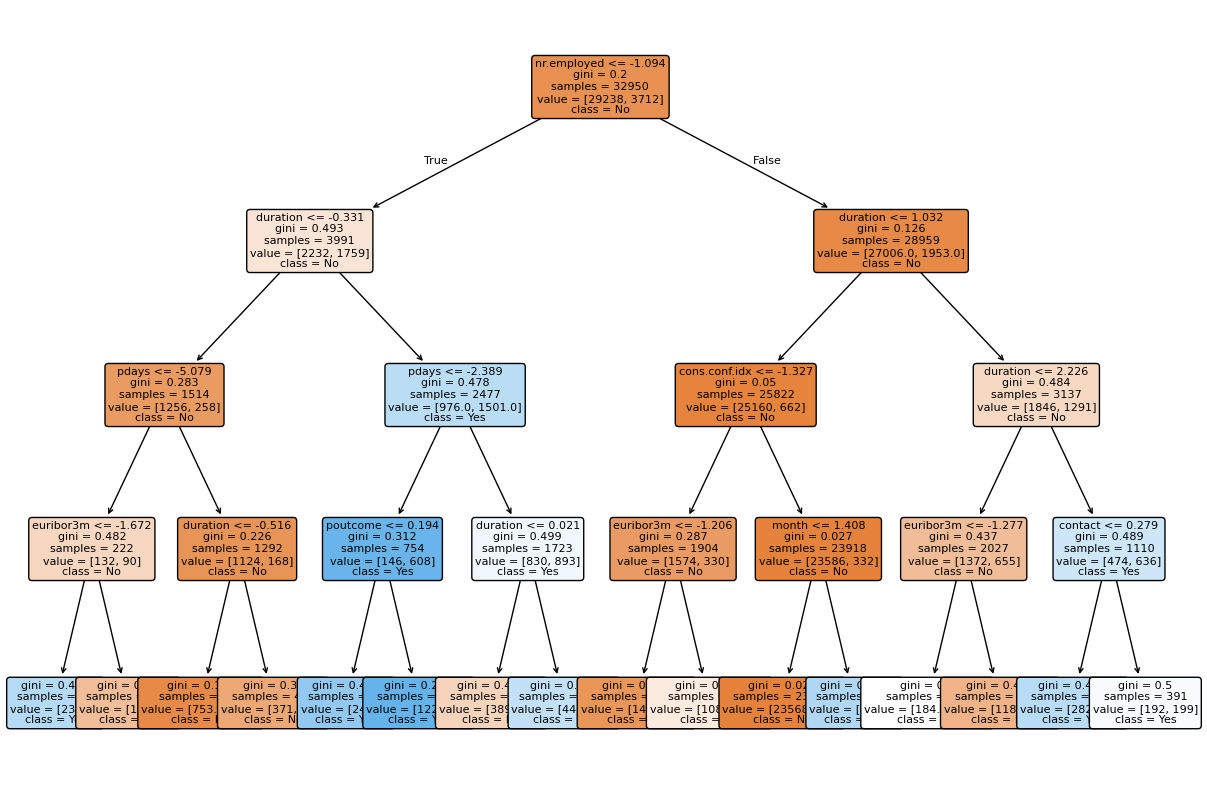

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set max depth to avoid overly complex trees
clf = DecisionTreeClassifier(max_depth=4, random_state=42)  # Limiting tree depth
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(15, 10))  # Adjust figure size for better visualization
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], 
          filled=True, rounded=True, fontsize=8)

plt.show()